#                 Project on Performance of Player in an Inning

importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
details = pd.read_csv('season ipl.csv', index_col=None)
batting = pd.read_csv('bat ipl.csv', index_col=None)
summary = pd.read_csv('summary ipl.csv', index_col=None)
bowling = pd.read_csv('ball ipl.csv', index_col=None)

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
details[['season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'batsman1_name',  'bowler1_name']].head(6)

,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,batsman1_name,bowler1_name
0,2020,1216492,MI v CSK,MI,CSK,MI,1,1,1,4,Rohit Sharma,Deepak Chahar
1,2020,1216492,MI v CSK,MI,CSK,MI,1,1,2,1,Rohit Sharma,Deepak Chahar
2,2020,1216492,MI v CSK,MI,CSK,MI,1,1,3,2,Quinton de Kock,Deepak Chahar
3,2020,1216492,MI v CSK,MI,CSK,MI,1,1,4,4,Quinton de Kock,Deepak Chahar
4,2020,1216492,MI v CSK,MI,CSK,MI,1,1,5,0,Quinton de Kock,Deepak Chahar
5,2020,1216492,MI v CSK,MI,CSK,MI,1,1,6,1,Quinton de Kock,Deepak Chahar


In [4]:
def building_dataset():
    df = None
    df = details[(details["isWide"] == False) & (details["isNoball"] == False)]
    df1=pd.pivot_table(df, index=['season','match_id','batsman1_name','bowler1_name','home_team', 'away_team','innings_id'],values=['runs'],aggfunc=sum)
    df2=pd.pivot_table(df,  index=['season','match_id','batsman1_name','bowler1_name','home_team', 'away_team','innings_id'],values=['ball'],aggfunc=len)
    df_pivot = pd.concat([df1,df2],axis=1)
    df_pivot = df_pivot.reset_index()
    return df_pivot

In [5]:
train_df = building_dataset()
print('Pivot table shape :',train_df.shape)

Pivot table shape : (39763, 9)


In [6]:
train_df.head(10)

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,2,2,6
1,2008,335982,Ashley Noffke,Sourav Ganguly,RCB,KKR,2,7,4
2,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,2,0,2
3,2008,335982,Brendon McCullum,Ashley Noffke,RCB,KKR,1,25,12
4,2008,335982,Brendon McCullum,Cameron White,RCB,KKR,1,16,3
5,2008,335982,Brendon McCullum,Jacques Kallis,RCB,KKR,1,32,16
6,2008,335982,Brendon McCullum,Praveen Kumar,RCB,KKR,1,33,16
7,2008,335982,Brendon McCullum,Sunil Joshi,RCB,KKR,1,21,11
8,2008,335982,Brendon McCullum,Zaheer Khan,RCB,KKR,1,33,15
9,2008,335982,Cameron White,Ajit Agarkar,RCB,KKR,2,3,6


In [7]:
train_df.sort_values('runs', ascending=False).head(5)

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball
18496,2013,598054,Virat Kohli,Umesh Yadav,DC,RCB,1,52,17
29155,2017,1082612,Hashim Amla,Lasith Malinga,KXIP,MI,1,50,15
37785,2020,1216510,KL Rahul,Dale Steyn,KXIP,RCB,1,48,18
20420,2014,729317,Kieron Pollard,Amit Mishra,MI,SRH,2,47,18
35176,2019,1178399,Kieron Pollard,Sam Curran,MI,KXIP,2,47,15


In [8]:
train_df.sort_values('ball', ascending=False).head(5)

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball
39544,2020,1216547,Ishan Kishan,Navdeep Saini,RCB,MI,2,38,20
36302,2019,1178423,KL Rahul,Bhuvneshwar Kumar,SRH,KXIP,2,24,20
27583,2016,981003,David Warner,Jayant Yadav,DC,SRH,1,28,19
31736,2018,1136574,Rohit Sharma,Corey Anderson,MI,RCB,1,39,19
33845,2018,1136616,Suresh Raina,Andrew Tye,CSK,KXIP,2,36,19


In [9]:
train_df.iloc[train_df.where(train_df.runs.eq(train_df.runs.max())).ball.idxmin()]

season                  2013
match_id              598054
batsman1_name    Virat Kohli
bowler1_name     Umesh Yadav
home_team                 DC
away_team                RCB
innings_id                 1
runs                      52
ball                      17
Name: 18496, dtype: object

In [10]:
train_df.iloc[train_df.where(train_df.ball.eq(train_df.ball.max())).runs.idxmin()]

season                        2019
match_id                   1178423
batsman1_name             KL Rahul
bowler1_name     Bhuvneshwar Kumar
home_team                      SRH
away_team                     KXIP
innings_id                       2
runs                            24
ball                            20
Name: 36302, dtype: object

In [11]:
def add_features(df):
    for index, row in df.iterrows():
        try:
            temp = summary.loc[summary['id'] == df.at[index, 'match_id']]
            temp = temp.reset_index()
            df.at[index,'venue'] = temp.at[0,'venue_name']
            if df.at[index,'batsman1_name'] in (temp.at[0,'home_playx1'] ):
                df.at[index,'batsman_team'] = temp.at[0,'home_team']
            if df.at[index,'batsman1_name'] in (temp.at[0,'away_playx1'] ):
                df.at[index,'batsman_team'] = temp.at[0,'away_team']
            if df.at[index,'bowler1_name'] in (temp.at[0,'away_playx1'] ):
                df.at[index,'bowling_team'] = temp.at[0,'away_team']
            if df.at[index,'bowler1_name'] in (temp.at[0,'home_playx1'] ):
                df.at[index,'bowling_team'] = temp.at[0,'home_team']
            if df.at[index,'batsman_team'] in (temp.at[0,'home_team'] ):
                df.at[index,'home_game'] = 1
            else:
                df.at[index,'home_game'] = 0                                    
        except KeyError as e:
            print(e)
            continue

In [12]:
add_features(train_df)

In [13]:
train_df.head()

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball,venue,batsman_team,bowling_team,home_game
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,2,2,6,"M.Chinnaswamy Stadium, Bengaluru",RCB,KKR,1.0
1,2008,335982,Ashley Noffke,Sourav Ganguly,RCB,KKR,2,7,4,"M.Chinnaswamy Stadium, Bengaluru",RCB,KKR,1.0
2,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,2,0,2,"M.Chinnaswamy Stadium, Bengaluru",RCB,KKR,1.0
3,2008,335982,Brendon McCullum,Ashley Noffke,RCB,KKR,1,25,12,"M.Chinnaswamy Stadium, Bengaluru",KKR,RCB,0.0
4,2008,335982,Brendon McCullum,Cameron White,RCB,KKR,1,16,3,"M.Chinnaswamy Stadium, Bengaluru",KKR,RCB,0.0


# Feature Engineering

## Batsmans Stats

In [14]:
batting['strikeRate'] = batting['strikeRate'].replace({"-":"0"})
batting = batting.astype({"strikeRate": float})
bat_analysis = batting.groupby(['fullName']).mean()
bat_analysis = bat_analysis.reset_index()
print("Batting stats dataframe shape ", bat_analysis.shape)

Batting stats dataframe shape  (541, 12)


In [15]:
bat_analysis[['fullName','runs','ballsFaced','fours','sixes','strikeRate','captain']].sort_values('runs', ascending=False).head(10)

,fullName,runs,ballsFaced,fours,sixes,strikeRate,captain
217,Jonny Bairstow,37.619048,26.428571,3.761905,1.476190,117.735714,0.000000
253,Lendl Simmons,37.206897,29.379310,3.758621,1.517241,103.785517,0.000000
127,David Warner,37.000000,26.140845,3.591549,1.373239,124.315000,0.443662
222,KL Rahul,36.763889,27.069444,3.250000,1.444444,126.315694,0.194444
105,Chris Gayle,36.427481,24.267176,2.923664,2.664122,130.750153,0.000000
178,Hashim Amla,36.062500,25.437500,3.750000,1.312500,105.454375,0.000000
436,Shaun Marsh,35.898551,27.043478,3.855072,1.130435,116.362754,0.000000
280,Matthew Hayden,34.593750,25.156250,3.781250,1.375000,120.701563,0.000000
285,Michael Hussey,34.086207,27.793103,3.413793,0.896552,104.110517,0.000000
401,Ruturaj Gaikwad,34.000000,28.166667,2.666667,1.000000,73.303333,0.000000


Text(0.5, 0.98, 'Histogram of mean values attributes of Batsman')

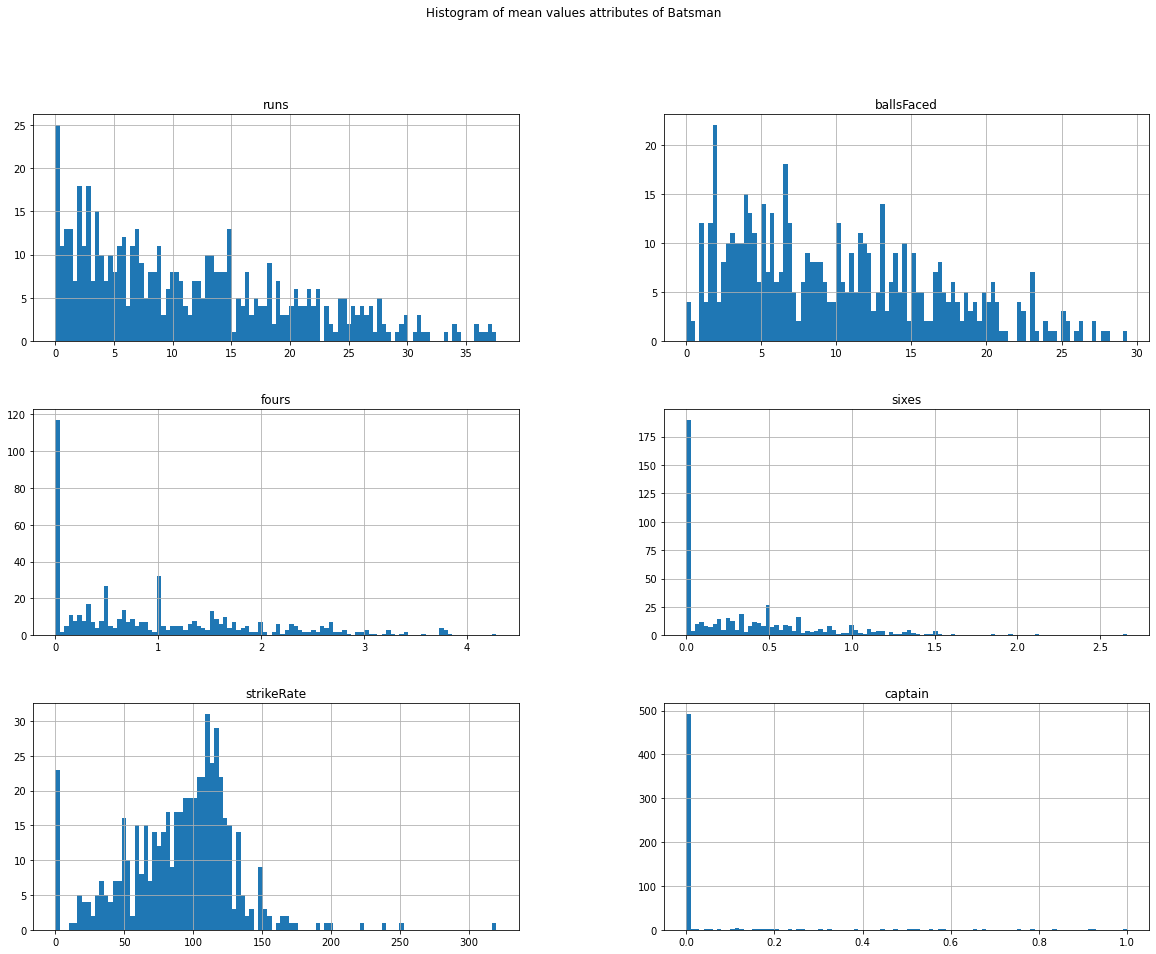

In [16]:
batsman_attr = ['runs','ballsFaced','fours','sixes','strikeRate', 'captain']
p = bat_analysis[batsman_attr].hist(bins=100, figsize=(20,15))
plt.suptitle("Histogram of mean values attributes of Batsman")

In [17]:
runs_df = batting.groupby(batting["fullName"]).runs.agg(["sum","count"]) 
runs_df = runs_df.reset_index()
runs_df = runs_df.rename(columns={"sum": "total_runs_scored", "count": "total_innings_batted"})

In [18]:
runs_df.head(5)

,fullName,total_runs_scored,total_innings_batted
0,AB de Villiers,4849.0,156
1,Aakash Chopra,53.0,6
2,Aaron Finch,2005.0,85
3,Abdul Samad,111.0,8
4,Abdur Razzak,0.0,1


In [19]:
balls_boundaries_df = batting.groupby(['fullName']).sum()
balls_boundaries_df = balls_boundaries_df.reset_index()
balls_boundaries_df = balls_boundaries_df.drop(['season', 'match_id', 'innings_id','runs','strikeRate','runningOver','link'], axis=1)
balls_boundaries_df = balls_boundaries_df.rename(columns={"ballsFaced": "total_balls_faced", "fours": "total_4s_hit","sixes": "total_6s_hit", "captain": "total_games_captained"})


In [20]:
balls_boundaries_df.head(5)

,fullName,total_balls_faced,total_4s_hit,total_6s_hit,total_games_captained
0,AB de Villiers,3192.0,390.0,235.0,0
1,Aakash Chopra,71.0,7.0,0.0,0
2,Aaron Finch,1570.0,204.0,75.0,10
3,Abdul Samad,65.0,8.0,6.0,0
4,Abdur Razzak,2.0,0.0,0.0,0


In [21]:
combined_batting_sum_df = pd.merge(runs_df, balls_boundaries_df, on='fullName')
combined_batting_sum_df = combined_batting_sum_df.reset_index()
combined_batting_sum_df = combined_batting_sum_df.drop(['index'], axis=1)
combined_batting_sum_df.head(5)

,fullName,total_runs_scored,total_innings_batted,total_balls_faced,total_4s_hit,total_6s_hit,total_games_captained
0,AB de Villiers,4849.0,156,3192.0,390.0,235.0,0
1,Aakash Chopra,53.0,6,71.0,7.0,0.0,0
2,Aaron Finch,2005.0,85,1570.0,204.0,75.0,10
3,Abdul Samad,111.0,8,65.0,8.0,6.0,0
4,Abdur Razzak,0.0,1,2.0,0.0,0.0,0


In [22]:
bat_analysis = bat_analysis.rename(columns={'runs':'avg_runs_scored', 'ballsFaced':'avg_balls_faced','fours':'avg_4s_scored','sixes':'avg_6s_scored','captain':'avg_games_captained','strikeRate':'batting_st_rate'})
bat_analysis = bat_analysis.drop(['season','match_id', 'innings_id', 'runningOver', 'link'], axis=1)
bat_analysis.head(5)

,fullName,avg_runs_scored,avg_balls_faced,avg_4s_scored,avg_6s_scored,batting_st_rate,avg_games_captained
0,AB de Villiers,31.083333,20.461538,2.500000,1.506410,133.241282,0.000000
1,Aakash Chopra,8.833333,11.833333,1.166667,0.000000,61.726667,0.000000
2,Aaron Finch,23.588235,18.470588,2.400000,0.882353,112.266588,0.117647
3,Abdul Samad,13.875000,8.125000,1.000000,0.750000,142.603750,0.000000
4,Abdur Razzak,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
batsman_stats = pd.merge(bat_analysis, combined_batting_sum_df, on="fullName")
batsman_stats.head(5)

,fullName,avg_runs_scored,avg_balls_faced,avg_4s_scored,avg_6s_scored,batting_st_rate,avg_games_captained,total_runs_scored,total_innings_batted,total_balls_faced,total_4s_hit,total_6s_hit,total_games_captained
0,AB de Villiers,31.083333,20.461538,2.500000,1.506410,133.241282,0.000000,4849.0,156,3192.0,390.0,235.0,0
1,Aakash Chopra,8.833333,11.833333,1.166667,0.000000,61.726667,0.000000,53.0,6,71.0,7.0,0.0,0
2,Aaron Finch,23.588235,18.470588,2.400000,0.882353,112.266588,0.117647,2005.0,85,1570.0,204.0,75.0,10
3,Abdul Samad,13.875000,8.125000,1.000000,0.750000,142.603750,0.000000,111.0,8,65.0,8.0,6.0,0
4,Abdur Razzak,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,2.0,0.0,0.0,0


In [24]:
batsman_stats.to_csv('batsman_numerical.csv',index=False)

In [25]:
bowling['economyRate'] = bowling['economyRate'].replace({"-":"0"})
bowling_df = bowling.astype({"economyRate": float})

In [26]:
bowling_df.head(5)

,season,match_id,match_name,home_team,away_team,bowling_team,venue,city,country,innings_id,...,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain,href
0,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,...,32,2,8.00,7,3,0,1,0,False,https://www.espncricinfo.com/ci/content/player...
1,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,...,28,1,7.00,9,4,0,0,0,False,https://www.espncricinfo.com/ci/content/player...
2,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,...,38,3,9.50,8,6,0,2,0,False,https://www.espncricinfo.com/ci/content/player...
3,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,...,21,1,5.25,11,0,1,1,0,False,https://www.espncricinfo.com/ci/content/player...
4,2020,1216492,MI v CSK,MI,CSK,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Abu Dhabi,United Arab Emirates,1,...,42,2,10.50,5,2,3,0,0,False,https://www.espncricinfo.com/ci/content/player...


In [27]:
bowl_analysis = bowling_df.groupby(['fullName']).mean()
bowl_analysis = bowl_analysis.reset_index()
bowl_analysis = bowl_analysis.drop(['season','match_id', 'innings_id' ], axis=1)
bowl_analysis.head(5)

,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain
0,Aaron Finch,1.420000,0.0,13.400000,0.200000,10.856000,2.600000,0.800000,0.800000,0.200000,0.0000,0.2
1,Aavishkar Salvi,3.571429,0.0,28.571429,1.000000,8.237143,8.714286,2.571429,1.000000,0.857143,0.0000,0.0
2,Abdul Samad,2.333333,0.0,32.000000,0.333333,17.250000,3.000000,1.333333,2.666667,0.333333,0.0000,0.0
3,Abdur Razzak,2.000000,0.0,29.000000,0.000000,14.500000,5.000000,3.000000,1.000000,1.000000,1.0000,0.0
4,Abhimanyu Mithun,3.000000,0.0,29.500000,0.437500,10.347500,5.937500,2.625000,1.312500,0.937500,0.5625,0.0


In [28]:
bowl_analysis = bowl_analysis.rename(columns={'overs':'bowler_avg_overs','maidens':'bowler_avg_maidens',
                                              'conceded':'bowler_avg_conceded','wickets':'bowler_avg_wkts','economyRate':'bowler_econ_rt',
                                              'dots':'bowler_avg_dots','foursConceded':'bowler_avg_4s','sixesConceded':'bowler_avg_6s',
                                              'wides':'bowler_avg_wides','noballs':'bowler_avg_noballs',
                                              'captain':'bowler_avg_captaincy'})

In [29]:
conceded_df = bowling_df.groupby(bowling_df["fullName"]).conceded.agg(["min","max","sum","count","mean"]) 
conceded_df = conceded_df.reset_index()
conceded_df = conceded_df.drop(['min', 'max', 'mean'], axis=1)
conceded_df = conceded_df.rename(columns={"sum": "bowler_total_conceded", "count": "total_innings_bowled"})

In [30]:
conceded_df.head(5)

,fullName,bowler_total_conceded,total_innings_bowled
0,Aaron Finch,67,5
1,Aavishkar Salvi,200,7
2,Abdul Samad,96,3
3,Abdur Razzak,29,1
4,Abhimanyu Mithun,472,16


In [31]:
other_stats_df = bowling_df.groupby(['fullName']).sum()
other_stats_df = other_stats_df.reset_index()
other_stats_df = other_stats_df.drop(['season', 'match_id', 'innings_id','conceded','economyRate'], axis=1)
other_stats_df = other_stats_df.rename(columns={'overs':'bowler_total_overs','maidens':'bowler_total_maidens',
                                                'wickets':'bowler_total_wkts','dots':'bowler_total_dots',
                                                'foursConceded':'bowler_total_4s','sixesConceded':'bowler_total_6s',
                                                'wides':'bowler_total_wides','noballs':'bowler_total_noballs',
                                                'captain':'bowler_total_captaincy'})

In [32]:
other_stats_df.head(5)

,fullName,bowler_total_overs,bowler_total_maidens,bowler_total_wkts,bowler_total_dots,bowler_total_4s,bowler_total_6s,bowler_total_wides,bowler_total_noballs,bowler_total_captaincy
0,Aaron Finch,7.1,0,1,13,4,4,1,0,1
1,Aavishkar Salvi,25.0,0,7,61,18,7,6,0,0
2,Abdul Samad,7.0,0,1,9,4,8,1,0,0
3,Abdur Razzak,2.0,0,0,5,3,1,1,1,0
4,Abhimanyu Mithun,48.0,0,7,95,42,21,15,9,0


In [33]:
combined_bowling_sum_df = pd.merge(conceded_df, other_stats_df, on='fullName')
combined_bowling_sum_df = combined_bowling_sum_df.reset_index()
combined_bowling_sum_df = combined_bowling_sum_df.drop(['index'], axis=1)
combined_bowling_sum_df.head(5)

,fullName,bowler_total_conceded,total_innings_bowled,bowler_total_overs,bowler_total_maidens,bowler_total_wkts,bowler_total_dots,bowler_total_4s,bowler_total_6s,bowler_total_wides,bowler_total_noballs,bowler_total_captaincy
0,Aaron Finch,67,5,7.1,0,1,13,4,4,1,0,1
1,Aavishkar Salvi,200,7,25.0,0,7,61,18,7,6,0,0
2,Abdul Samad,96,3,7.0,0,1,9,4,8,1,0,0
3,Abdur Razzak,29,1,2.0,0,0,5,3,1,1,1,0
4,Abhimanyu Mithun,472,16,48.0,0,7,95,42,21,15,9,0


In [34]:
bowler_stats = pd.merge(bowl_analysis, combined_bowling_sum_df, on="fullName")
bowler_stats.head(5)

,fullName,bowler_avg_overs,bowler_avg_maidens,bowler_avg_conceded,bowler_avg_wkts,bowler_econ_rt,bowler_avg_dots,bowler_avg_4s,bowler_avg_6s,bowler_avg_wides,...,total_innings_bowled,bowler_total_overs,bowler_total_maidens,bowler_total_wkts,bowler_total_dots,bowler_total_4s,bowler_total_6s,bowler_total_wides,bowler_total_noballs,bowler_total_captaincy
0,Aaron Finch,1.420000,0.0,13.400000,0.200000,10.856000,2.600000,0.800000,0.800000,0.200000,...,5,7.1,0,1,13,4,4,1,0,1
1,Aavishkar Salvi,3.571429,0.0,28.571429,1.000000,8.237143,8.714286,2.571429,1.000000,0.857143,...,7,25.0,0,7,61,18,7,6,0,0
2,Abdul Samad,2.333333,0.0,32.000000,0.333333,17.250000,3.000000,1.333333,2.666667,0.333333,...,3,7.0,0,1,9,4,8,1,0,0
3,Abdur Razzak,2.000000,0.0,29.000000,0.000000,14.500000,5.000000,3.000000,1.000000,1.000000,...,1,2.0,0,0,5,3,1,1,1,0
4,Abhimanyu Mithun,3.000000,0.0,29.500000,0.437500,10.347500,5.937500,2.625000,1.312500,0.937500,...,16,48.0,0,7,95,42,21,15,9,0


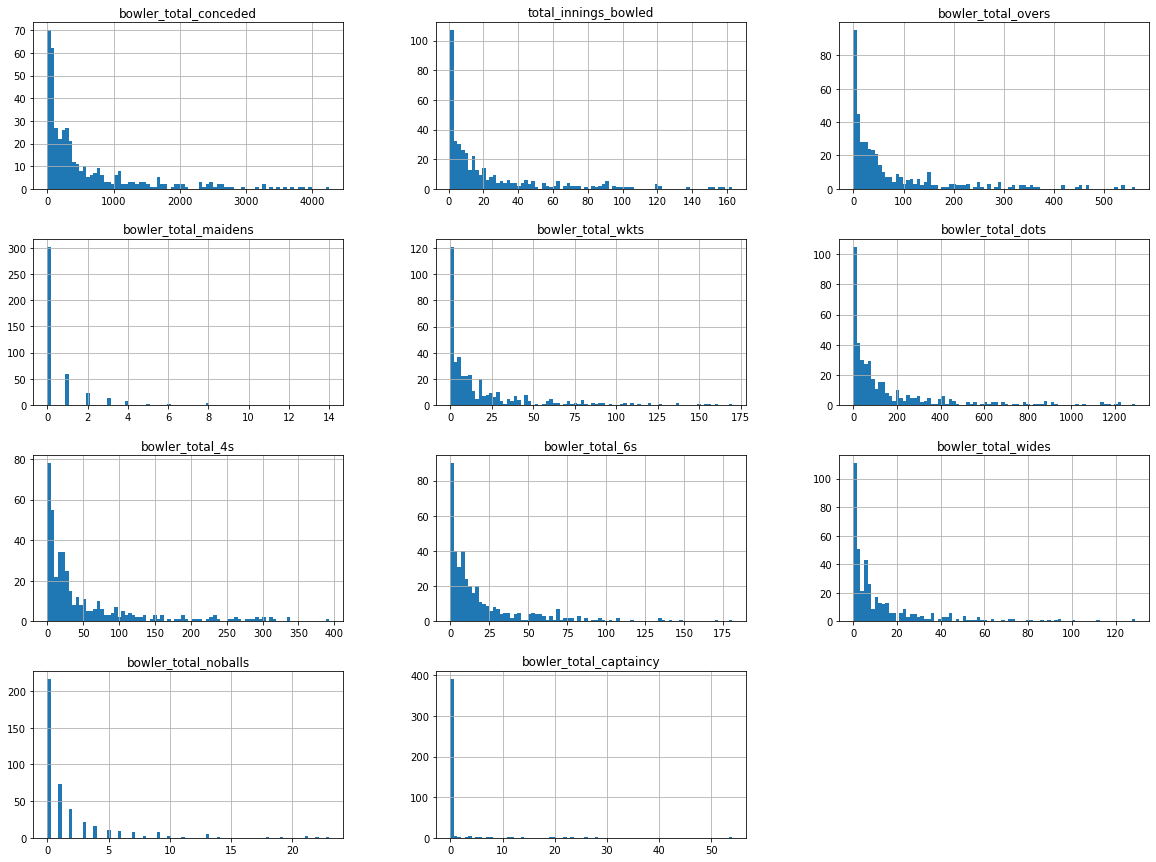

In [35]:
p = bowler_stats[['bowler_total_conceded',
       'total_innings_bowled', 'bowler_total_overs', 'bowler_total_maidens',
       'bowler_total_wkts', 'bowler_total_dots', 'bowler_total_4s',
       'bowler_total_6s', 'bowler_total_wides', 'bowler_total_noballs',
       'bowler_total_captaincy']].hist( bins=80, figsize=(20,15))

In [36]:
bowler_stats.to_csv('bowler_numerical.csv',index=False)

In [37]:
def fill_batsman_attributes(df):
    for index, row in df.iterrows():
        try:
            temp = batsman_stats.loc[batsman_stats['fullName'] == df.at[index, 'batsman1_name']]
            temp = temp.reset_index()
            if df.empty:
                print('DataFrame is empty for {}'.format(df.at[index, 'batsman1_name']))
            else:
                df.at[index,'avg_runs_scored'] = temp.at[0,'avg_runs_scored']
                df.at[index,'avg_balls_faced'] = temp.at[0,'avg_balls_faced']
                df.at[index,'avg_4s_scored'] = temp.at[0,'avg_4s_scored'] 
                df.at[index,'avg_6s_scored'] = temp.at[0,'avg_6s_scored'] 
                df.at[index,'batting_st_rate'] = temp.at[0,'batting_st_rate'] 
                df.at[index,'avg_games_captained'] = temp.at[0,'avg_games_captained'] 
                df.at[index,'total_runs_scored'] = temp.at[0,'total_runs_scored'] 
                df.at[index,'total_innings_batted'] = temp.at[0,'total_innings_batted'] 
                df.at[index,'total_balls_faced'] = temp.at[0,'total_balls_faced'] 
                df.at[index,'total_4s_hit'] = temp.at[0,'total_4s_hit'] 
                df.at[index,'total_6s_hit'] = temp.at[0,'total_6s_hit'] 
                df.at[index,'total_games_captained'] = temp.at[0,'total_games_captained'] 
        except KeyError as e:
            print(e)
            continue

In [38]:
fill_batsman_attributes(train_df)

In [39]:
def fill_bowler_attributes(df):
    for index, row in df.iterrows():
        try:
            temp = bowler_stats.loc[bowler_stats['fullName'] == df.at[index, 'bowler1_name']]
            temp = temp.reset_index()
            if df.empty:
                print('DataFrame is empty for {}'.format(df.at[index, 'bowler1_name']))
            else:
                df.at[index,'bowler_avg_overs'] = temp.at[0,'bowler_avg_overs']
                df.at[index,'bowler_avg_maidens'] = temp.at[0,'bowler_avg_maidens']
                df.at[index,'bowler_avg_conceded'] = temp.at[0,'bowler_avg_conceded']
                df.at[index,'bowler_avg_wkts'] = temp.at[0,'bowler_avg_wkts']
                df.at[index,'bowler_econ_rt'] = temp.at[0,'bowler_econ_rt']
                df.at[index,'bowler_avg_dots'] = temp.at[0,'bowler_avg_dots']
                df.at[index,'bowler_avg_4s'] = temp.at[0,'bowler_avg_4s']
                df.at[index,'bowler_avg_6s'] = temp.at[0,'bowler_avg_6s']
                df.at[index,'bowler_avg_wides'] = temp.at[0,'bowler_avg_wides']
                df.at[index,'bowler_avg_noballs'] = temp.at[0,'bowler_avg_noballs']
                df.at[index,'bowler_avg_captaincy'] = temp.at[0,'bowler_avg_captaincy']
                df.at[index,'bowler_total_conceded'] = temp.at[0,'bowler_total_conceded']
                df.at[index,'total_innings_bowled'] = temp.at[0,'total_innings_bowled']
                df.at[index,'bowler_total_overs'] = temp.at[0,'bowler_total_overs']
                df.at[index,'bowler_total_maidens'] = temp.at[0,'bowler_total_maidens']
                df.at[index,'bowler_total_wkts'] = temp.at[0,'bowler_total_wkts']
                df.at[index,'bowler_total_dots'] = temp.at[0,'bowler_total_dots']
                df.at[index,'bowler_total_4s'] = temp.at[0,'bowler_total_4s']
                df.at[index,'bowler_total_6s'] = temp.at[0,'bowler_total_6s']
                df.at[index,'bowler_total_wides'] = temp.at[0,'bowler_total_wides']
                df.at[index,'bowler_total_noballs'] = temp.at[0,'bowler_total_noballs']
                df.at[index,'bowler_total_captaincy'] = temp.at[0,'bowler_total_captaincy']
        except KeyError as e:
            print(e)
            continue            


In [40]:
fill_bowler_attributes(train_df)

In [41]:
train_df.head(5)

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball,venue,...,total_innings_bowled,bowler_total_overs,bowler_total_maidens,bowler_total_wkts,bowler_total_dots,bowler_total_4s,bowler_total_6s,bowler_total_wides,bowler_total_noballs,bowler_total_captaincy
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,2,2,6,"M.Chinnaswamy Stadium, Bengaluru",...,42.0,130.2,0.0,29.0,273.0,113.0,41.0,36.0,2.0,0.0
1,2008,335982,Ashley Noffke,Sourav Ganguly,RCB,KKR,2,7,4,"M.Chinnaswamy Stadium, Bengaluru",...,20.0,46.0,0.0,10.0,82.0,25.0,14.0,3.0,1.0,14.0
2,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,2,0,2,"M.Chinnaswamy Stadium, Bengaluru",...,42.0,130.2,0.0,29.0,273.0,113.0,41.0,36.0,2.0,0.0
3,2008,335982,Brendon McCullum,Ashley Noffke,RCB,KKR,1,25,12,"M.Chinnaswamy Stadium, Bengaluru",...,1.0,4.0,0.0,1.0,7.0,2.0,2.0,1.0,0.0,0.0
4,2008,335982,Brendon McCullum,Cameron White,RCB,KKR,1,16,3,"M.Chinnaswamy Stadium, Bengaluru",...,6.0,7.0,0.0,1.0,8.0,5.0,6.0,4.0,0.0,0.0


In [42]:
train_df.to_csv('train.csv',index=False)

In [43]:
corr_matrix = train_df[['batsman1_name', 'bowler1_name', 'home_team',
       'away_team', 'innings_id', 'runs', 'ball', 'venue', 'batsman_team',
       'bowling_team', 'home_game', 'avg_runs_scored', 'avg_balls_faced',
       'avg_4s_scored', 'avg_6s_scored', 'batting_st_rate',
       'avg_games_captained', 'total_runs_scored', 'total_innings_batted',
       'total_balls_faced', 'total_4s_hit', 'total_6s_hit',
       'total_games_captained', 'bowler_avg_overs', 'bowler_avg_maidens',
       'bowler_avg_conceded', 'bowler_avg_wkts', 'bowler_econ_rt',
       'bowler_avg_dots', 'bowler_avg_4s', 'bowler_avg_6s', 'bowler_avg_wides',
       'bowler_avg_noballs', 'bowler_avg_captaincy', 'bowler_total_conceded',
       'total_innings_bowled', 'bowler_total_overs', 'bowler_total_maidens',
       'bowler_total_wkts', 'bowler_total_dots', 'bowler_total_4s',
       'bowler_total_6s', 'bowler_total_wides', 'bowler_total_noballs',
       'bowler_total_captaincy']].corr()
corr_matrix['runs'].sort_values(ascending=False)

runs                      1.000000
ball                      0.756098
avg_runs_scored           0.258642
avg_4s_scored             0.238047
avg_balls_faced           0.237109
avg_6s_scored             0.203890
total_4s_hit              0.177494
total_runs_scored         0.175898
total_balls_faced         0.169865
total_6s_hit              0.168440
batting_st_rate           0.155651
total_innings_batted      0.137891
total_games_captained     0.078557
bowler_avg_6s             0.077073
avg_games_captained       0.075843
bowler_econ_rt            0.072816
bowler_avg_conceded       0.045377
home_game                 0.013068
bowler_avg_4s             0.010112
bowler_total_6s           0.005523
bowler_avg_overs          0.000190
bowler_avg_captaincy     -0.004016
bowler_total_captaincy   -0.005688
bowler_avg_noballs       -0.007902
bowler_total_conceded    -0.010157
total_innings_bowled     -0.012904
bowler_total_overs       -0.014602
innings_id               -0.016775
bowler_avg_wides    

In [44]:
train=train_df
train.head(10)

,season,match_id,batsman1_name,bowler1_name,home_team,away_team,innings_id,runs,ball,venue,...,total_innings_bowled,bowler_total_overs,bowler_total_maidens,bowler_total_wkts,bowler_total_dots,bowler_total_4s,bowler_total_6s,bowler_total_wides,bowler_total_noballs,bowler_total_captaincy
0,2008,335982,Ashley Noffke,Ajit Agarkar,RCB,KKR,2,2,6,"M.Chinnaswamy Stadium, Bengaluru",...,42.0,130.2,0.0,29.0,273.0,113.0,41.0,36.0,2.0,0.0
1,2008,335982,Ashley Noffke,Sourav Ganguly,RCB,KKR,2,7,4,"M.Chinnaswamy Stadium, Bengaluru",...,20.0,46.0,0.0,10.0,82.0,25.0,14.0,3.0,1.0,14.0
2,2008,335982,Balachandra Akhil,Ajit Agarkar,RCB,KKR,2,0,2,"M.Chinnaswamy Stadium, Bengaluru",...,42.0,130.2,0.0,29.0,273.0,113.0,41.0,36.0,2.0,0.0
3,2008,335982,Brendon McCullum,Ashley Noffke,RCB,KKR,1,25,12,"M.Chinnaswamy Stadium, Bengaluru",...,1.0,4.0,0.0,1.0,7.0,2.0,2.0,1.0,0.0,0.0
4,2008,335982,Brendon McCullum,Cameron White,RCB,KKR,1,16,3,"M.Chinnaswamy Stadium, Bengaluru",...,6.0,7.0,0.0,1.0,8.0,5.0,6.0,4.0,0.0,0.0
5,2008,335982,Brendon McCullum,Jacques Kallis,RCB,KKR,1,32,16,"M.Chinnaswamy Stadium, Bengaluru",...,89.0,290.2,3.0,65.0,640.0,236.0,58.0,48.0,9.0,0.0
6,2008,335982,Brendon McCullum,Praveen Kumar,RCB,KKR,1,33,16,"M.Chinnaswamy Stadium, Bengaluru",...,119.0,419.2,14.0,90.0,1147.0,338.0,104.0,112.0,1.0,0.0
7,2008,335982,Brendon McCullum,Sunil Joshi,RCB,KKR,1,21,11,"M.Chinnaswamy Stadium, Bengaluru",...,4.0,9.1,0.0,1.0,18.0,6.0,5.0,0.0,0.0,0.0
8,2008,335982,Brendon McCullum,Zaheer Khan,RCB,KKR,1,33,15,"M.Chinnaswamy Stadium, Bengaluru",...,99.0,365.6,5.0,102.0,929.0,312.0,64.0,74.0,2.0,23.0
9,2008,335982,Cameron White,Ajit Agarkar,RCB,KKR,2,3,6,"M.Chinnaswamy Stadium, Bengaluru",...,42.0,130.2,0.0,29.0,273.0,113.0,41.0,36.0,2.0,0.0


Checking top venue

In [45]:
import math
def calculate_top_venues():
    summary_df = pd.read_csv('summary ipl.csv', index_col=None)
    valcount = summary_df['venue_name'].value_counts()
    valcount = valcount.reset_index()
    total_games = valcount['venue_name'].sum()
    counter = 0
    for i in range(0,8):
        print(valcount.at[i,'index'], valcount.at[i,'venue_name'])
        counter += valcount.at[i,'venue_name']

    print("Percentage of total games played at these venues : {}%".format(math.floor(counter/total_games*100)))

calculate_top_venues()

M.Chinnaswamy Stadium, Bengaluru 83
Eden Gardens, Kolkata 79
Arun Jaitley Stadium, Delhi 75
Wankhede Stadium, Mumbai 73
Rajiv Gandhi International Stadium, Uppal, Hyderabad 64
MA Chidambaram Stadium, Chepauk, Chennai 57
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh 56
Sawai Mansingh Stadium, Jaipur 47
Percentage of total games played at these venues : 64%


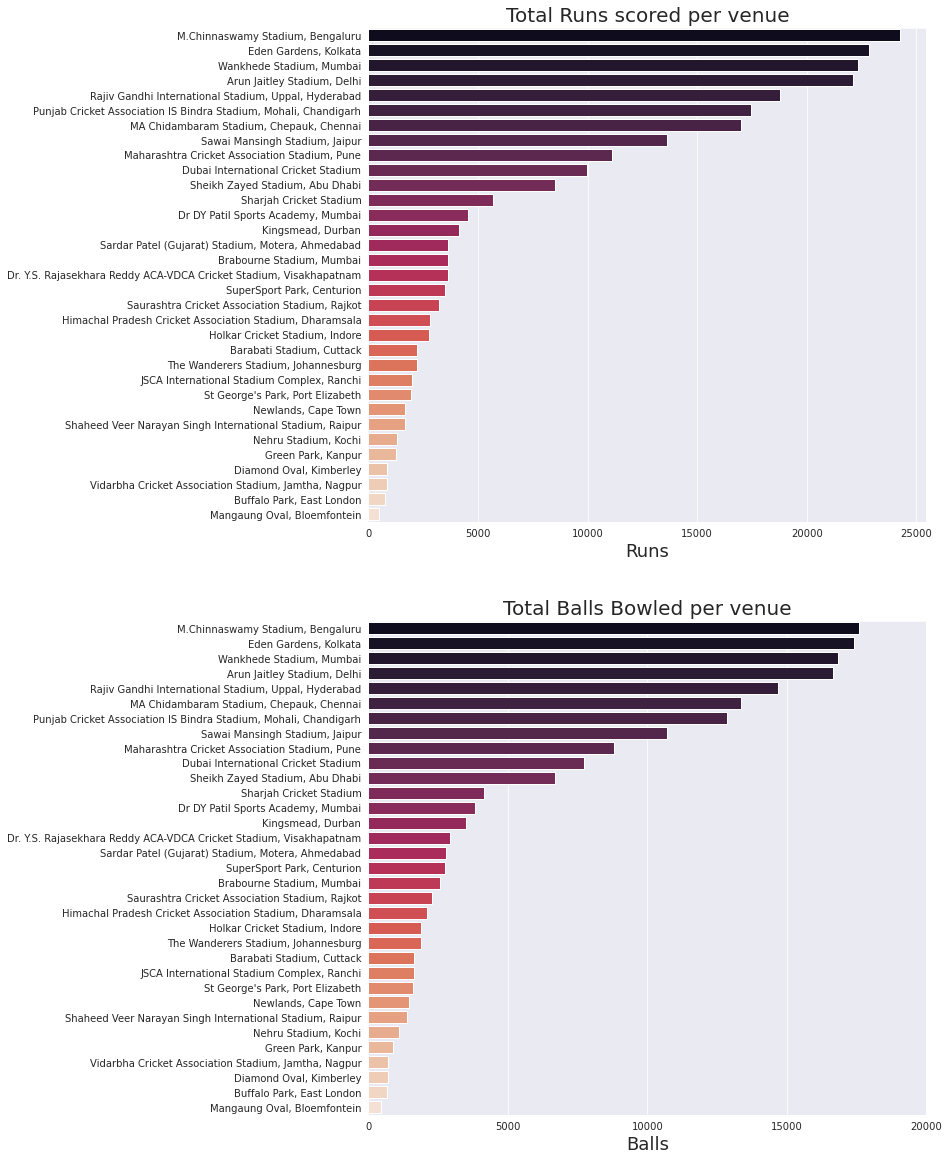

In [46]:
venue = train.groupby(['venue']).sum()#.reset_index(name='counts')
venue = venue.reset_index()
venue = venue.sort_values(['runs'], ascending=False).reset_index(drop=True)
f = plt.figure(figsize=(10, 20))
gs = f.add_gridspec(2,1)
with sns.axes_style("darkgrid"):
    #sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})    
    ax = f.add_subplot(gs[0, 0])    
    g1 = sns.barplot(y="venue", x='runs', data=venue, palette="rocket")
    g1.set_ylabel(None,fontsize=20)
    g1.axes.set_xlabel("Runs",fontsize=18)     
    g1.axes.set_xticks(range(0,30000,5000))    
    g1.axes.set_title("Total Runs scored per venue",fontsize=20)

venue = venue.sort_values(['ball'], ascending=False).reset_index(drop=True)

with sns.axes_style("darkgrid"):
    #sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})    
    ax = f.add_subplot(gs[1, 0])    
    g1 = sns.barplot(y="venue", x='ball', data=venue, palette="rocket")
    g1.set_ylabel(None,fontsize=20)
    g1.set_ylabel(None,fontsize=20)
    g1.axes.set_xlabel("Balls",fontsize=18)     
    g1.axes.set_xticks(range(0,25000,5000))    
    g1.axes.set_title("Total Balls Bowled per venue",fontsize=20)

In [47]:
venue_map = {'M.Chinnaswamy Stadium, Bengaluru':'Bengaluru',
'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh':'Mohali',
'Arun Jaitley Stadium, Delhi':'Delhi',
'Wankhede Stadium, Mumbai':'Mumbai',
'Eden Gardens, Kolkata':'Kolkata',
'Sawai Mansingh Stadium, Jaipur':'Jaipur',
'Rajiv Gandhi International Stadium, Uppal, Hyderabad':'Hyderabad',
'MA Chidambaram Stadium, Chepauk, Chennai':'Chennai',
'Dr DY Patil Sports Academy, Mumbai':'Others',
'Newlands, Cape Town':'Others',
'St George\'s Park, Port Elizabeth':'Others',
'Kingsmead, Durban':'Others',
'SuperSport Park, Centurion':'Others',
'Buffalo Park, East London':'Others',
'The Wanderers Stadium, Johannesburg':'Others',
'Diamond Oval, Kimberley':'Others',
'Mangaung Oval, Bloemfontein':'Others',
'Brabourne Stadium, Mumbai':'Others',
'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad':'Others',
'Barabati Stadium, Cuttack':'Others',
'Vidarbha Cricket Association Stadium, Jamtha, Nagpur':'Others',
'Himachal Pradesh Cricket Association Stadium, Dharamsala':'Others',
'Nehru Stadium, Kochi':'Others',
'Holkar Cricket Stadium, Indore':'Others',
'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam':'Others',
'Maharashtra Cricket Association Stadium, Pune':'Pune',
'Shaheed Veer Narayan Singh International Stadium, Raipur':'Others',
'JSCA International Stadium Complex, Ranchi':'Others',
'Sheikh Zayed Stadium, Abu Dhabi':'Others',
'Sharjah Cricket Stadium':'Others',
'Dubai International Cricket Stadium':'Others',
'Saurashtra Cricket Association Stadium, Rajkot':'Others',
'Green Park, Kanpur':'Others'}
def map_venue(venue_name):
    return venue_map[venue_name]
train['venue'] = train.apply(lambda x: map_venue(x['venue']),axis=1)
pd.set_option('display.max_columns', None)
train['venue'].value_counts()

Others       12232
Kolkata       3784
Bengaluru     3758
Mumbai        3648
Delhi         3615
Hyderabad     3159
Chennai       2755
Mohali        2698
Jaipur        2262
Pune          1852
Name: venue, dtype: int64

In [48]:
train_set = train.copy()
print('train {} train_set {}'.format(train.shape, train_set.shape))

train (39763, 47) train_set (39763, 47)


### Shuffling Data

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train_set, train_set['venue']):
    strat_train_set = train_set.loc[train_index]
    strat_test_set = train_set.loc[test_index]
    

In [50]:
train_set['venue'].value_counts() / len(train)

Others       0.307623
Kolkata      0.095164
Bengaluru    0.094510
Mumbai       0.091744
Delhi        0.090914
Hyderabad    0.079446
Chennai      0.069286
Mohali       0.067852
Jaipur       0.056887
Pune         0.046576
Name: venue, dtype: float64

In [51]:
numeric_features = ['ball', 'avg_runs_scored', 'avg_balls_faced',
       'avg_4s_scored', 'avg_6s_scored', 'batting_st_rate',
       'avg_games_captained', 'total_runs_scored', 'total_innings_batted',
       'total_balls_faced', 'total_4s_hit', 'total_6s_hit',
       'total_games_captained', 'bowler_avg_overs', 'bowler_avg_maidens',
       'bowler_avg_conceded', 'bowler_avg_wkts', 'bowler_econ_rt',
       'bowler_avg_dots', 'bowler_avg_4s', 'bowler_avg_6s', 'bowler_avg_wides',
       'bowler_avg_noballs', 'bowler_avg_captaincy', 'bowler_total_conceded',
       'total_innings_bowled', 'bowler_total_overs', 'bowler_total_maidens',
       'bowler_total_wkts', 'bowler_total_dots', 'bowler_total_4s',
       'bowler_total_6s', 'bowler_total_wides', 'bowler_total_noballs',
       'bowler_total_captaincy']

categorical_features = ['venue', 'batsman_team', 'bowling_team', 'home_game','innings_id']

remainder_features = ['season', 'match_id', 'batsman1_name', 'bowler1_name', 'home_team', 'away_team']

## Pipeline

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import set_config

X = strat_train_set.drop("runs", axis = 1) # train_data will feed to the model
y = strat_train_set['runs'] # label to predict

def build_model(model):
    numerical_pipe = Pipeline([('std_scaler',StandardScaler())])
    categorical_pipe = Pipeline([('one_hot',OneHotEncoder())])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    regr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression_model', model)])   
    set_config(display='diagram')
    return regr

def get_pipeline():
    numerical_pipe = Pipeline([('std_scaler',StandardScaler())])
    categorical_pipe = Pipeline([('one_hot',OneHotEncoder())])
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    return preprocessor

def calculate_train_rmse(name, model):
    runs_predictions = model.predict(X)
    mse = mean_squared_error(y, runs_predictions)
    rmse = np.sqrt(mse)
    print("Training RMSE of {} : {}".format(name,rmse))

def sample_prediction(name, model, num_records):
    some_data = X.iloc[:num_records]
    some_labels = y.iloc[:num_records]
    preds = []
    for label in list(model.predict(some_data)):
        preds.append(math.floor(label))

    print("Predictions on training data using :", name)    
    print("Predictions    :", preds)
    print("Actual labels  :", list(some_labels))    

## LinearRegression

In [53]:
linear_reg = build_model(LinearRegression())
linear_reg.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ball', 'avg_runs_scored',
                                                   'avg_balls_faced',
                                                   'avg_4s_scored',
                                                   'avg_6s_scored',
                                                   'batting_st_rate',
                                                   'avg_games_captained',
                                                   'total_runs_scored',
                                                   'total_innings_batted',
                                                   'total_balls_faced',
                                                   'total_4s_hit',
                                                   'total_6s_hit',
                                                   'total_games_captained',...
                                                   'bowler_avg_noballs',
                                                   'bowler_avg_captaincy',
                                                   'bowler_total_conceded',
                                                   'total_innings_bowled',
                                                   'bowler_total_overs',
                                                   'bowler_total_maidens',
                                                   'bowler_total_wkts',
                                                   'bowler_total_dots', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['venue', 'batsman_team',
                                                   'bowling_team', 'home_game',
                                                   'innings_id'])])),
                ('regression_model', LinearRegression())])

In [54]:
calculate_train_rmse("LinearRegression",linear_reg)

Training RMSE of LinearRegression : 3.763402879216948


In [55]:
sample_prediction("LinearRegression",linear_reg, 10)

Predictions on training data using : LinearRegression
Predictions    : [3, 11, 16, 5, 13, 4, 9, 2, 1, 0]
Actual labels  : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0]


# DecisionTrees

In [56]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = build_model(DecisionTreeRegressor())
tree_reg.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ball', 'avg_runs_scored',
                                                   'avg_balls_faced',
                                                   'avg_4s_scored',
                                                   'avg_6s_scored',
                                                   'batting_st_rate',
                                                   'avg_games_captained',
                                                   'total_runs_scored',
                                                   'total_innings_batted',
                                                   'total_balls_faced',
                                                   'total_4s_hit',
                                                   'total_6s_hit',
                                                   'total_games_captained',...
                                                   'bowler_avg_captaincy',
                                                   'bowler_total_conceded',
                                                   'total_innings_bowled',
                                                   'bowler_total_overs',
                                                   'bowler_total_maidens',
                                                   'bowler_total_wkts',
                                                   'bowler_total_dots', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['venue', 'batsman_team',
                                                   'bowling_team', 'home_game',
                                                   'innings_id'])])),
                ('regression_model', DecisionTreeRegressor())])

In [57]:
calculate_train_rmse("DecisionTreeRegressor",tree_reg)

Training RMSE of DecisionTreeRegressor : 0.22338408759814787


In [58]:
sample_prediction("DecisionTreeRegressor", tree_reg, 10)

Predictions on training data using : DecisionTreeRegressor
Predictions    : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0]
Actual labels  : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0]


Data getting overfitted n Decision Tree Regression

# RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = build_model(RandomForestRegressor(random_state = 42))
forest_reg.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ball', 'avg_runs_scored',
                                                   'avg_balls_faced',
                                                   'avg_4s_scored',
                                                   'avg_6s_scored',
                                                   'batting_st_rate',
                                                   'avg_games_captained',
                                                   'total_runs_scored',
                                                   'total_innings_batted',
                                                   'total_balls_faced',
                                                   'total_4s_hit',
                                                   'total_6s_hit',
                                                   'total_games_captained',...
                                                   'bowler_avg_captaincy',
                                                   'bowler_total_conceded',
                                                   'total_innings_bowled',
                                                   'bowler_total_overs',
                                                   'bowler_total_maidens',
                                                   'bowler_total_wkts',
                                                   'bowler_total_dots', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['venue', 'batsman_team',
                                                   'bowling_team', 'home_game',
                                                   'innings_id'])])),
                ('regression_model', RandomForestRegressor(random_state=42))])

In [60]:
calculate_train_rmse("RandomForestRegressor",forest_reg)

Training RMSE of RandomForestRegressor : 1.4661756426330275


In [61]:
sample_prediction("RandomForestRegressor", forest_reg, 10)

Predictions on training data using : RandomForestRegressor
Predictions    : [1, 13, 13, 8, 10, 5, 12, 2, 1, 0]
Actual labels  : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0]


# Support Vector Machines

In [62]:
from sklearn.svm import LinearSVR
svm_reg = build_model(LinearSVR(epsilon = 1.5, max_iter = 3000))
svm_reg.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ball', 'avg_runs_scored',
                                                   'avg_balls_faced',
                                                   'avg_4s_scored',
                                                   'avg_6s_scored',
                                                   'batting_st_rate',
                                                   'avg_games_captained',
                                                   'total_runs_scored',
                                                   'total_innings_batted',
                                                   'total_balls_faced',
                                                   'total_4s_hit',
                                                   'total_6s_hit',
                                                   'total_games_captained',...
                                                   'bowler_avg_captaincy',
                                                   'bowler_total_conceded',
                                                   'total_innings_bowled',
                                                   'bowler_total_overs',
                                                   'bowler_total_maidens',
                                                   'bowler_total_wkts',
                                                   'bowler_total_dots', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['venue', 'batsman_team',
                                                   'bowling_team', 'home_game',
                                                   'innings_id'])])),
                ('regression_model', LinearSVR(epsilon=1.5, max_iter=3000))])

In [63]:
calculate_train_rmse("LinearSVR",svm_reg)

Training RMSE of LinearSVR : 3.788397908056367


In [64]:
sample_prediction("LinearSVR", svm_reg, 10)

Predictions on training data using : LinearSVR
Predictions    : [2, 11, 15, 5, 12, 3, 9, 2, 1, 0]
Actual labels  : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0]


From above models we can see that the RandomForestRegressor is giving the best results. 

# Model Tuning

In [65]:
print("RandomForestRegressor params : ", forest_reg[-1].get_params())

RandomForestRegressor params :  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'regression_model__n_estimators': [3, 10, 30, 50], 'regression_model__max_features' : [2, 4, 6, 8, 10, 12]},
    {'regression_model__bootstrap': [False], 'regression_model__n_estimators' : [3, 10], 'regression_model__max_features' : [2, 3, 4] }
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ball',
                                                                          'avg_runs_scored',
                                                                          'avg_balls_faced',
                                                                          'avg_4s_scored',
                                                                          'avg_6s_scored',
                                                                          'batting_st_rate',
                                                                          'avg_games_captained',
                                                                          'total_runs_scored',
                                                                          'total_innings_batted',
                                                                          'total_balls_faced',
                                                                          'total_4s_hit',
                                                                          'total_6s_h...
                                       ('regression_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'regression_model__max_features': [2, 4, 6, 8, 10,
                                                             12],
                          'regression_model__n_estimators': [3, 10, 30, 50]},
                         {'regression_model__bootstrap': [False],
                          'regression_model__max_features': [2, 3, 4],
                          'regression_model__n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'regression_model__max_features': 12, 'regression_model__n_estimators': 50}

In [68]:
set_config(display='diagram')
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ball', 'avg_runs_scored',
                                                   'avg_balls_faced',
                                                   'avg_4s_scored',
                                                   'avg_6s_scored',
                                                   'batting_st_rate',
                                                   'avg_games_captained',
                                                   'total_runs_scored',
                                                   'total_innings_batted',
                                                   'total_balls_faced',
                                                   'total_4s_hit',
                                                   'total_6s_hit',
                                                   'total_games_captained',...
                                                   'total_innings_bowled',
                                                   'bowler_total_overs',
                                                   'bowler_total_maidens',
                                                   'bowler_total_wkts',
                                                   'bowler_total_dots', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['venue', 'batsman_team',
                                                   'bowling_team', 'home_game',
                                                   'innings_id'])])),
                ('regression_model',
                 RandomForestRegressor(max_features=12, n_estimators=50,
                                       random_state=42))])

In [69]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

5.859352853698509 {'regression_model__max_features': 2, 'regression_model__n_estimators': 3}
5.263139802584029 {'regression_model__max_features': 2, 'regression_model__n_estimators': 10}
4.967677392284405 {'regression_model__max_features': 2, 'regression_model__n_estimators': 30}
4.921088760286959 {'regression_model__max_features': 2, 'regression_model__n_estimators': 50}
5.464318185121963 {'regression_model__max_features': 4, 'regression_model__n_estimators': 3}
4.830342300410354 {'regression_model__max_features': 4, 'regression_model__n_estimators': 10}
4.582869111956744 {'regression_model__max_features': 4, 'regression_model__n_estimators': 30}
4.597206958562349 {'regression_model__max_features': 4, 'regression_model__n_estimators': 50}
5.178369175076129 {'regression_model__max_features': 6, 'regression_model__n_estimators': 3}
4.547153956945869 {'regression_model__max_features': 6, 'regression_model__n_estimators': 10}
4.302176632737688 {'regression_model__max_features': 6, 'regres

In [70]:
sample_prediction("RandomForestRegressor", forest_reg, 20)

Predictions on training data using : RandomForestRegressor
Predictions    : [1, 13, 13, 8, 10, 5, 12, 2, 1, 0, 7, 4, 12, 2, 4, 22, 12, 5, 2, 11]
Actual labels  : [1, 15, 11, 10, 7, 7, 14, 2, 1, 0, 10, 4, 12, 2, 5, 25, 15, 7, 2, 10]


# Evaluate the model on test set

In [71]:
final_model = grid_search.best_estimator_
preprocessor = get_pipeline()

X_test = strat_test_set.drop("runs", axis = 1)
y_test = strat_test_set["runs"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print("Test RMSE : ", final_rmse)

Test RMSE :  3.7992682397560977


# Cross validation

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [73]:
def display_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())    

In [74]:
display_scores(tree_rmse_scores)

Scores :  [5.2224487  5.46768967 5.42957397 5.53885847 5.3172387  5.51200428
 5.48448843 5.4937806  5.35106557 5.56525124]
Mean :  5.438239961827972
Standard Deviation :  0.10328104400856149


In [75]:
scores_linear = cross_val_score(linear_reg, X, y, scoring="neg_mean_squared_error", cv=10)
ln_rmse_scores = np.sqrt(-scores_linear)

In [76]:
display_scores(ln_rmse_scores)

Scores :  [3.76040789 3.85004611 3.72850435 3.81977054 3.66678057 3.73141021
 3.8347934  3.83487564 3.69858831 3.77062007]
Mean :  3.7695797093137706
Standard Deviation :  0.06028854529498557


In [77]:
scores_forest = cross_val_score(forest_reg, X, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores_forest)

In [80]:
display_scores(forest_rmse_scores)

Scores :  [3.82185551 4.02555304 3.82644301 3.93941602 3.77892926 3.87200688
 3.93905587 3.96189911 3.79307244 3.91360136]
Mean :  3.887183248218561
Standard Deviation :  0.07720672762364376


In [81]:
svm_cross = cross_val_score(svm_reg, X, y, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_cross)

In [82]:
display_scores(svm_rmse_scores)

Scores :  [3.79557025 3.88297936 3.75698743 3.84200688 3.68005641 3.75810912
 3.86823922 3.88451679 3.70997126 3.76255615]
Mean :  3.79409928585317
Standard Deviation :  0.06900715739485402


In [91]:
import joblib as jbl
jbl.dump(linear_reg, "linear_reg.pkl")

['linear_reg.pkl']

In [84]:
jbl.dump(tree_reg, "tree_reg.pkl")

['tree_reg.pkl']

In [85]:
jbl.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [86]:
jbl.dump(svm_reg, "svm_reg.pkl")

['svm_reg.pkl']

In [93]:
linear_model = jbl.load("linear_reg.pkl")

In [94]:
linear_model.predict(X)

array([ 3.06640625, 11.86132812, 16.4453125 , ...,  4.5       ,
        6.26367188,  1.1953125 ])

# Predictions for single Match

In [79]:
summary_df = pd.read_csv('summary ipl.csv', index_col=None)
detail_df = pd.read_csv('season ipl.csv', index_col=None)

C:\Users\Hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [87]:
summary_df.loc[summary_df['id'] == 1216496]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
3,2020,1216496,Rajasthan Royals v Chennai Super Kings,RR v CSK,"4th Match (N), Indian Premier League at Sharja...",RR,CSK,CSK,BOWL FIRST,216/7,200/6,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,2020-09-24T23:59Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,"Rajasthan Royals 2, Chennai Super Kings 0",False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0,"Sanju Samson, Steven Smith, Jofra Archer help ...","Sanju Samson,Steven Smith","Rahul Tewatia,Jofra Archer","Yashasvi Jaiswal (BT),Steven Smith (BT),Sanju ...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Faf du Plessis,Shane Watson","Sam Curran,Deepak Chahar",22 September 2020 - night match (20-over match),Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,Vengalil Narayan Kutty,Krishnamachari Srinivasan


In [88]:
batsman_stats = pd.read_csv('batsman_numerical.csv', index_col=None)
bowler_stats = pd.read_csv('bowler_numerical.csv', index_col=None)

class DataToPredict:
    def __init__(self, match_id, venue = 'Others'):
        self.match_id = match_id
        self.data = None
        self.venue = venue
        self.predicted_runs = None # y_hat
        self.X = None
        self.y = None # old values
        
    def load(self):
        match = detail_df.loc[detail_df['match_id'] == self.match_id]
        #print("match shape ",match.shape)        
        match = match.reset_index()
        df = match[(match["isWide"] == False) & (match["isNoball"] == False)]
        df1=pd.pivot_table(df, index=['season','match_id','batsman1_name','bowler1_name','home_team', 'away_team','innings_id'],values=['runs'],aggfunc=sum)
        df2=pd.pivot_table(df,  index=['season','match_id','batsman1_name','bowler1_name','home_team', 'away_team','innings_id'],values=['ball'],aggfunc=len)
        match = pd.concat([df1,df2],axis=1)
        #print("match shape ",match.shape)
        match = match.reset_index()
        match = match.sort_values('innings_id')
        #match = match.drop(columns=['index'], axis=1)
        self.data = match
        return self.data
    
    def fill_batsman_attributes(self):
        df = self.data
        for index, row in df.iterrows():
            try:
                temp = batsman_stats.loc[batsman_stats['fullName'] == df.at[index, 'batsman1_name']]
                temp = temp.reset_index()
                if df.empty:
                    print('DataFrame is empty for {}'.format(df.at[index, 'batsman1_name']))
                else:
                    df.at[index,'avg_runs_scored'] = temp.at[0,'avg_runs_scored']
                    df.at[index,'avg_balls_faced'] = temp.at[0,'avg_balls_faced']
                    df.at[index,'avg_4s_scored'] = temp.at[0,'avg_4s_scored'] 
                    df.at[index,'avg_6s_scored'] = temp.at[0,'avg_6s_scored'] 
                    df.at[index,'batting_st_rate'] = temp.at[0,'batting_st_rate'] 
                    df.at[index,'avg_games_captained'] = temp.at[0,'avg_games_captained'] 
                    df.at[index,'total_runs_scored'] = temp.at[0,'total_runs_scored'] 
                    df.at[index,'total_innings_batted'] = temp.at[0,'total_innings_batted'] 
                    df.at[index,'total_balls_faced'] = temp.at[0,'total_balls_faced'] 
                    df.at[index,'total_4s_hit'] = temp.at[0,'total_4s_hit'] 
                    df.at[index,'total_6s_hit'] = temp.at[0,'total_6s_hit'] 
                    df.at[index,'total_games_captained'] = temp.at[0,'total_games_captained'] 
            except KeyError as e:
                print(e)
                continue
        self.data = df
        return self.data

    def fill_bowler_attributes(self):
        df = self.data
        for index, row in df.iterrows():
            try:
                temp = bowler_stats.loc[bowler_stats['fullName'] == df.at[index, 'bowler1_name']]
                temp = temp.reset_index()
                if df.empty:
                    print('DataFrame is empty for {}'.format(df.at[index, 'bowler1_name']))
                else:
                    df.at[index,'bowler_avg_overs'] = temp.at[0,'bowler_avg_overs']
                    df.at[index,'bowler_avg_maidens'] = temp.at[0,'bowler_avg_maidens']
                    df.at[index,'bowler_avg_conceded'] = temp.at[0,'bowler_avg_conceded']
                    df.at[index,'bowler_avg_wkts'] = temp.at[0,'bowler_avg_wkts']
                    df.at[index,'bowler_econ_rt'] = temp.at[0,'bowler_econ_rt']
                    df.at[index,'bowler_avg_dots'] = temp.at[0,'bowler_avg_dots']
                    df.at[index,'bowler_avg_4s'] = temp.at[0,'bowler_avg_4s']
                    df.at[index,'bowler_avg_6s'] = temp.at[0,'bowler_avg_6s']
                    df.at[index,'bowler_avg_wides'] = temp.at[0,'bowler_avg_wides']
                    df.at[index,'bowler_avg_noballs'] = temp.at[0,'bowler_avg_noballs']
                    df.at[index,'bowler_avg_captaincy'] = temp.at[0,'bowler_avg_captaincy']
                    df.at[index,'bowler_total_conceded'] = temp.at[0,'bowler_total_conceded']
                    df.at[index,'total_innings_bowled'] = temp.at[0,'total_innings_bowled']
                    df.at[index,'bowler_total_overs'] = temp.at[0,'bowler_total_overs']
                    df.at[index,'bowler_total_maidens'] = temp.at[0,'bowler_total_maidens']
                    df.at[index,'bowler_total_wkts'] = temp.at[0,'bowler_total_wkts']
                    df.at[index,'bowler_total_dots'] = temp.at[0,'bowler_total_dots']
                    df.at[index,'bowler_total_4s'] = temp.at[0,'bowler_total_4s']
                    df.at[index,'bowler_total_6s'] = temp.at[0,'bowler_total_6s']
                    df.at[index,'bowler_total_wides'] = temp.at[0,'bowler_total_wides']
                    df.at[index,'bowler_total_noballs'] = temp.at[0,'bowler_total_noballs']
                    df.at[index,'bowler_total_captaincy'] = temp.at[0,'bowler_total_captaincy']
            except KeyError as e:
                print(e)
                continue 
        self.data = df
        return self.data

    def add_features(self):
        df = self.data
        for index, row in df.iterrows():
            try:
                temp = summary_df.loc[summary_df['id'] == df.at[index, 'match_id']]
                temp = temp.reset_index()
                #df.at[index,'venue'] = temp.at[0,'venue_name']
                df.at[index,'venue'] = self.venue
                if df.at[index,'batsman1_name'] in (temp.at[0,'home_playx1'] ):
                    df.at[index,'batsman_team'] = temp.at[0,'home_team']
                if df.at[index,'batsman1_name'] in (temp.at[0,'away_playx1'] ):
                    df.at[index,'batsman_team'] = temp.at[0,'away_team']
                if df.at[index,'bowler1_name'] in (temp.at[0,'away_playx1'] ):
                    df.at[index,'bowling_team'] = temp.at[0,'away_team']
                if df.at[index,'bowler1_name'] in (temp.at[0,'home_playx1'] ):
                    df.at[index,'bowling_team'] = temp.at[0,'home_team']
                if df.at[index,'batsman_team'] in (temp.at[0,'home_team'] ):
                    df.at[index,'home_game'] = 1
                else:
                    df.at[index,'home_game'] = 0                                    
            except KeyError as e:
                print(e)
                continue
        self.data = df
        return self.data

    def predict_runs(self):
        self.y = self.data['runs'] # label to predict       
        self.X = self.data.drop(columns=["runs"], axis = 1) # train_data will feed to the model
        self.predicted_runs = forest_reg.predict(self.X)
        #print("Original Runs  : ", self.y) 
        print("Predicted Runs : ", np.ndarray.round(self.predicted_runs,0)) 
        
    def add_preds_to_df(self):
        self.data['prediction'] = np.ndarray.round(self.predicted_runs,0)
        return self.data
    
    def print_preds(self):
        self.data[['batsman1_name','bowler1_name','innings_id','runs','prediction','ball']]
        
    def declare_winner(self):
        result_df = pd.pivot_table(self.data, index=['innings_id'],values=['runs', 'prediction'],aggfunc=sum)
        result_df = result_df.reset_index()
        innings1_score =  result_df.loc[result_df['innings_id']== 1]['prediction'][0]
        innings2_score =  result_df.loc[result_df['innings_id']== 2]['prediction'][1]
        print("first innings score  : ",innings1_score)
        print("second innings score : ",innings2_score)
        
        #innings_id 	prediction 	runs
        #0 	1 	162.0 	192
        #1 	2 	181.0 	195

In [89]:
loader = DataToPredict(1216496, venue ='Jaipur')
#loader = DataToPredict('336012', venue ='Others')
csk_rr = loader.load()
csk_rr = loader.add_features()
csk_rr = loader.fill_batsman_attributes()
csk_rr = loader.fill_bowler_attributes()
loader.predict_runs()
csk_rr = loader.add_preds_to_df()
#loader.print_preds()
loader.declare_winner()

Predicted Runs :  [ 1.  6.  7.  5. 15. 17.  6.  3.  5.  3.  6. 17. 14. 16.  1.  9.  8.  7.
  4.  7.  5.  0.  4.  6.  2.  4. 13.  8. 10. 14.  1. 11. 11.  9. 13.  4.
  2. 13.  1.  2.  4.  2. 22. 11.  3.  3.  5.  2.  0.  1.]
first innings score  :  162.0
second innings score :  181.0


# Visualising Predictions

In [90]:
score = csk_rr[['batsman1_name','bowler1_name','innings_id','runs','prediction','ball']]
score = score.reset_index()
score = score.groupby(["batsman1_name","innings_id"])[["runs","prediction","ball"]].sum()
score = score.reset_index()
score[["batsman1_name","innings_id","runs","prediction","ball"]].sort_values("innings_id", ascending=True)

,batsman1_name,innings_id,runs,prediction,ball
1,Jofra Archer,1,13,10.0,4
5,Rahul Tewatia,1,10,9.0,8
7,Riyan Parag,1,6,6.0,4
8,Robin Uthappa,1,5,8.0,9
11,Sanju Samson,1,73,50.0,31
13,Steven Smith,1,69,62.0,47
14,Tom Curran,1,10,11.0,8
15,Yashasvi Jaiswal,1,6,6.0,6
0,Faf du Plessis,2,72,58.0,37
2,Kedar Jadhav,2,21,20.0,15
